<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


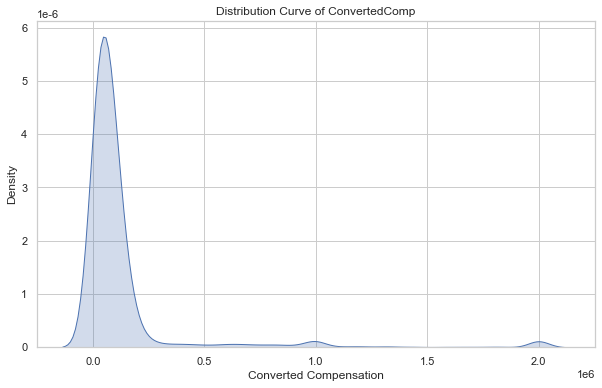

In [5]:
# your code goes here
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="ConvertedComp", shade=True)

plt.title("Distribution Curve of ConvertedComp")
plt.xlabel("Converted Compensation")
plt.ylabel("Density")
plt.show()

Plot the histogram for the column `ConvertedComp`.


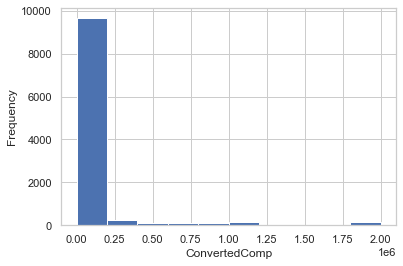

In [9]:
# your code goes here
plt.hist(df["ConvertedComp"])

plt.xlabel("ConvertedComp")
plt.ylabel("Frequency")
plt.show()

What is the median of the column `ConvertedComp`?


In [10]:
# your code goes here
df['ConvertedComp'].median()

57745.0

In [14]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [21]:
df['Sexuality'][0]

'Straight / Heterosexual'

How many responders identified themselves only as a **Man**?


In [27]:
# your code goes here
df[(df['Gender'] == 'Man') & (df['Sexuality'] == 'Straight / Heterosexual')].shape[0]

9504

In [31]:
# your code goes here
woman = df[(df['Gender'] == 'Woman') & (df['Sexuality'] == 'Straight / Heterosexual')]
woman['ConvertedComp'].median()

54000.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [32]:
# your code goes here
summary = df['Age'].describe()[['min', '25%', '50%', '75%', 'max']]
summary

min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


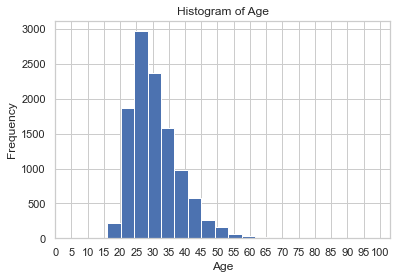

In [84]:
# your code goes here
plt.hist(df['Age'], bins=20)
plt.xticks(range(0, 101, 5))
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

In [81]:
df['Age'].median()

29.0

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


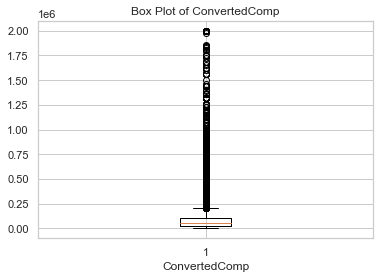

In [72]:
# your code goes here
import matplotlib.pyplot as plt

ConvertedComp = df[['ConvertedComp']]
# cast the 'ConvertedComp' column to float and clean any null values
ConvertedComp = pd.to_numeric(df['ConvertedComp'], errors='coerce').dropna().astype(float)
plt.boxplot(ConvertedComp)

plt.xlabel('ConvertedComp')
plt.title('Box Plot of ConvertedComp')
plt.show()

# # check if all the values in the 'ConvertedComp' column are numeric
# numeric_col = pd.to_numeric(df['ConvertedComp'], errors='coerce')
# is_numeric = pd.notnull(numeric_col).all()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [73]:
# your code goes here
q1 = ConvertedComp.quantile(0.25)
q3 = ConvertedComp.quantile(0.75)
iqr = q3 - q1
iqr

73132.0

Find out the upper and lower bounds.


In [74]:
# your code goes here
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
print("Lower bound for 'ConvertedComp':", lower_bound)
print("Upper bound for 'ConvertedComp':", upper_bound)

Lower bound for 'ConvertedComp': -82830.0
Upper bound for 'ConvertedComp': 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [75]:
# your code goes here
num_outliers = ((ConvertedComp < lower_bound) | (ConvertedComp > upper_bound)).sum()
num_outliers

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [76]:
# your code goes here
df_no_outliers = ConvertedComp[(ConvertedComp >= lower_bound) & (ConvertedComp <= upper_bound)]
df_no_outliers

0         61000.0
1         95179.0
2         90000.0
4         65277.0
5         31140.0
           ...   
11392      9600.0
11393    130000.0
11394     19880.0
11395    105000.0
11396     80371.0
Name: ConvertedComp, Length: 9703, dtype: float64

In [90]:
df_no_outliers.mean()
# df['ConvertedComp'].median()

59883.20838915799

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [79]:
# your code goes here
corr_matrix = df.corr()['Age'].drop('Age')
corr_matrix

<ipython-input-79-1158121fc9b7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()['Age'].drop('Age')


Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
